<a href="https://colab.research.google.com/github/jdz014/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS12_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# 1) Write a function

In [0]:
def prob_drunk_given_positive(true_positive_rate, prob_drunk_prior, false_positive_rate):
  
  compliment_probability = 1 - prob_drunk_prior
  
  posterior_probability = (true_positive_rate*prob_drunk_prior) / ((true_positive_rate*prob_drunk_prior) + (false_positive_rate*compliment_probability))
  
  return posterior_probability

### What is the probability that a person is drunk after one positive breathalyzer test?

In [9]:
# Only 1.2% chance actually drunk after 1 test
prob_drunk_given_positive(1, 1/1000, .08)

0.012357884330202669

### What is the probability that a person is drunk after two positive breathalyzer tests?

In [12]:
# 13.5% chance actually drunk after 2 tests
prob_drunk_given_positive(1 , 0.012357884330202669, .08)

0.13525210993291495

### How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [13]:
prob_drunk_given_positive(1, 0.13525210993291495, .08)

0.6615996951348605

In [14]:
# Only after 4 breathalyzer tests will there be a >95% probability
prob_drunk_given_positive(1, 0.6615996951348605, .08)

0.9606895076105054

# 2) Explore `scipy.stats.bayes_mvs`

In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-22 21:11:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-01-22 21:11:07 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import numpy as np
import pandas as pd

In [17]:
#Loading data and cleaning data
column_headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']

df = pd.read_csv('house-votes-84.data', header=None,names=column_headers, na_values='?' )

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [18]:
# Creating integer values for y and n
df= df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [20]:
#Creating variable for democrat data
dem = df[df['party']=='democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
#Dropping NaNs for column
col = dem['water-project']
dem_water_project_no_nans = col[~np.isnan(col)]

In [0]:
import scipy.stats as stats

def confidence_interval(data, confidence_level=0.95):
  data = np.array(data)
  # Sample mean
  x_bar = np.mean(data)
  # Sample size
  n = len(data)
  # Sample(non population) standard deviation
  s = np.std(data, ddof=1)
  # t-statistic
  t = stats.t.ppf((1+confidence_level) / 2, n-1)
  print("Sample Size:", n)
  
  standard_error = s/np.sqrt(n)
  margin_of_error = t*standard_error

  upper_bound = x_bar + margin_of_error
  lower_bound = x_bar - margin_of_error

  return (lower_bound, x_bar, upper_bound)

In [24]:
confidence_interval(dem_water_project_no_nans)

Sample Size: 239


(0.43824514095228484, 0.502092050209205, 0.5659389594661252)

In [51]:
bayesian_confidence_interval, _, _ = stats.bayes_mvs(dem_water_project_no_nans, alpha=.95)

print(bayesian_confidence_interval.minmax)

(0.43824514095228484, 0.5659389594661252)


Sample Size: 239


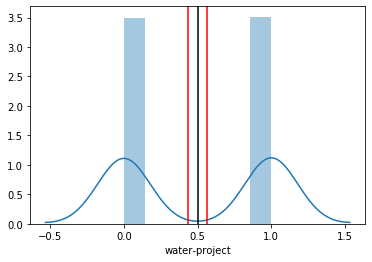

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.distplot(dem_water_project_no_nans, bins=7)
CIF = confidence_interval(dem_water_project_no_nans)
plt.axvline(x=CIF[0], color='red')
plt.axvline(x=CIF[1], color='black')
plt.axvline(x=CIF[2], color='red');

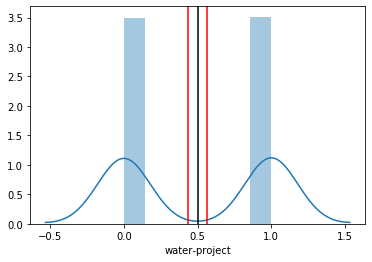

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.distplot(dem_water_project_no_nans, bins=7)
CIB = bayesian_confidence_interval.statistic
CIB2 = bayesian_confidence_interval.minmax

plt.axvline(x=CIB, color='black')
plt.axvline(x=CIB2[0], color='red')
plt.axvline(x=CIB2[1], color='red');

# 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Bayesian statistics assign probability to parameters resulting in posterior probability. Frequentist statistics uses confidence intervals resulting in p-values.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!